In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

sns.set(style="darkgrid")

data = pd.read_csv("BlackFriday.csv")
data.head(4)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057


In [51]:
data=data.fillna("0")
data["Occupation"] = data['Occupation'].apply(int)
data["Stay_In_Current_City_Years"] = data['Stay_In_Current_City_Years'].str.replace("+", "").apply(int)
data["Marital_Status"] = data['Marital_Status'].apply(float)
data["Product_Category_1"] = data['Product_Category_1'].apply(int)
data["Product_Category_2"] = data['Product_Category_2'].apply(float)
data["Product_Category_3"] = data['Product_Category_3'].apply(float)
data["Purchase"] = data['Purchase'].apply(int)
data.tail(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0.0,1,2.0,0.0,11664
537573,1004737,P00111142,M,36-45,16,C,1,0.0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0.0,8,15.0,0.0,8043
537575,1004737,P00285842,M,36-45,16,C,1,0.0,5,0.0,0.0,7172
537576,1004737,P00118242,M,36-45,16,C,1,0.0,5,8.0,0.0,6875


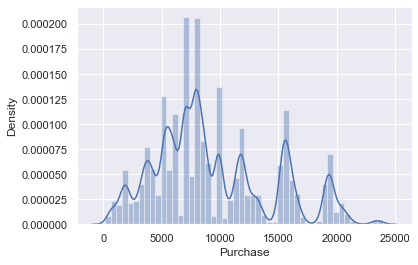

In [52]:
from sklearn.linear_model import Ridge , Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import numpy as np

data['Product_Category_2']=data['Product_Category_2'].astype(int)
data['Product_Category_3']=data['Product_Category_3'].astype(int)
Gender = {'F': 0, 'M': 1} # Ж = 0 М =1
CityCategory={'A':0, 'B':1, 'C':2} # A = 0 B = 1 C = 2
StayInCurCitYear={'0':0,'1':1,'2':2,'3':3,'4+':4}
AgeCrit={'0-17':0,'18-25':1,'26-35':2,'36-45':3,'46-50':4,'51-55':5,'55+':6} # 0-17 = 0 18-25 = 1 26-35 = 2 36-45 = 3 46-50 = 4 51-55 = 5 55+ = 6
data['Gender'] = data['Gender'].astype(str).map(Gender).fillna(data['Gender'])
data['City_Category'] = data['City_Category'].astype(str).map(CityCategory).fillna(data['City_Category'])
data['Age'] = data['Age'].astype(str).map(AgeCrit).fillna(data['Age'])
data['Stay_In_Current_City_Years']=data['Stay_In_Current_City_Years'].astype(str).map(StayInCurCitYear).fillna(data['Stay_In_Current_City_Years'])
TableInfoCopy = data[['Gender','Age','Occupation','City_Category','Marital_Status','Stay_In_Current_City_Years','Purchase']]
X = TableInfoCopy.drop(columns = ['Purchase'])
y = TableInfoCopy["Purchase"].apply(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

sns.distplot(y_train)


numeric_data = X_train.select_dtypes([np.number])
numeric_data_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_data_mean)
X_test = X_test.fillna(numeric_data_mean)

In [53]:
modelRidge = Ridge()
modelRidge.fit(X_train[numeric_features], y_train)
y_pred = modelRidge.predict(X_test[numeric_features])
y_train_pred = modelRidge.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 24545081.0678
Train MSE = 24620093.2841


In [54]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(modelRidge, X_train[numeric_features], y_train, cv=10, scoring="neg_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 -24827235.2552
	-24758967.5256
	-24496399.5038
	-24289143.7102
	-24500128.9526
	-24624594.5180
	-24453002.7917
	-24610203.8060
	-24887869.7876
	-24762626.0750
Mean CV MSE = 24621017.1926


In [55]:
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

rmse_scorer = make_scorer(
    rmse,
    greater_is_better=False
)

In [56]:
modelRidge = Ridge()
modelRidge.fit(X_train[numeric_features], y_train)
y_pred = modelRidge.predict(X_test[numeric_features])
y_train_pred = modelRidge.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 24545081.0678
Train MSE = 24620093.2841


In [57]:
modelLasso = Lasso()
modelLasso.fit(X_train[numeric_features], y_train)
y_pred = modelLasso.predict(X_test[numeric_features])
y_train_pred = modelLasso.predict(X_train[numeric_features])

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred))

Test MSE = 24545218.3151
Train MSE = 24620106.8872


In [58]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

model = Ridge()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % rmse(y_test, y_pred))
print("Train RMSE = %.4f" % rmse(y_train, y_train_pred))

Test RMSE = 4954.2992
Train RMSE = 4961.8639


In [59]:
import pickle

filename = 'model.sav'
pickle.dump(modelRidge, open(filename, 'wb'))